In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

rectangle = np.array([[0, 0, 1],
                      [0, 2, 1],
                      [3, 2, 1],
                      [3, 0, 1],
                      [0, 0, 1]])

In [5]:
def plot_shape(points, title):
    """Helper function to plot 2D shapes"""
    plt.figure()
    plt.plot(points[:, 0], points[:, 1], marker='o')
    plt.title(title)
    plt.axis('equal')
    plt.grid()
    plt.show()

def translate(points, tx, ty):
    transformation_matrix = np.array([[1, 0, tx],
                                       [0, 1, ty],
                                       [0, 0, 1]])
    return np.dot(points, transformation_matrix.T)


def scale(points, sx, sy):
    transformation_matrix = np.array([[sx, 0, 0],
                                       [0, sy, 0],
                                       [0,  0, 1]])
    return np.dot(points, transformation_matrix.T)

def rotate(points, angle):
    radians = np.radians(angle)
    transformation_matrix = np.array([[np.cos(radians), -np.sin(radians), 0],
                                       [np.sin(radians),  np.cos(radians), 0],
                                       [0, 0, 1]])
    return np.dot(points, transformation_matrix.T)

def reflect(points, axis):
    if axis == 'x':
        transformation_matrix = np.array([[1, 0, 0],
                                           [0, -1, 0],
                                           [0,  0, 1]])
    elif axis == 'y':
        transformation_matrix = np.array([[-1, 0, 0],
                                           [0,  1, 0],
                                           [0,  0, 1]])
    return np.dot(points, transformation_matrix.T)

def shear(points, shx, shy):
    transformation_matrix = np.array([[1, shx, 0],
                                       [shy, 1, 0],
                                       [0,  0, 1]])
    return np.dot(points, transformation_matrix.T)

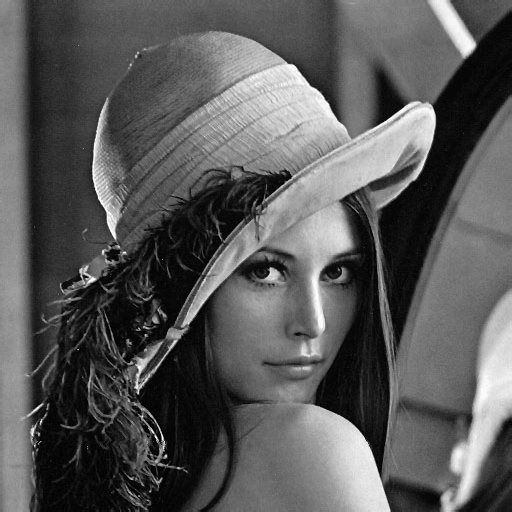

Original Image


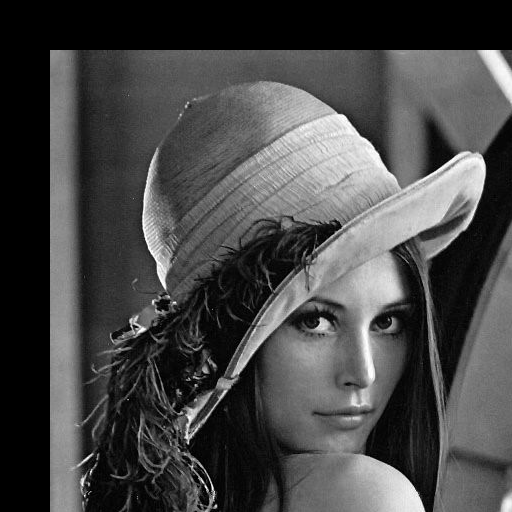

Translated Image


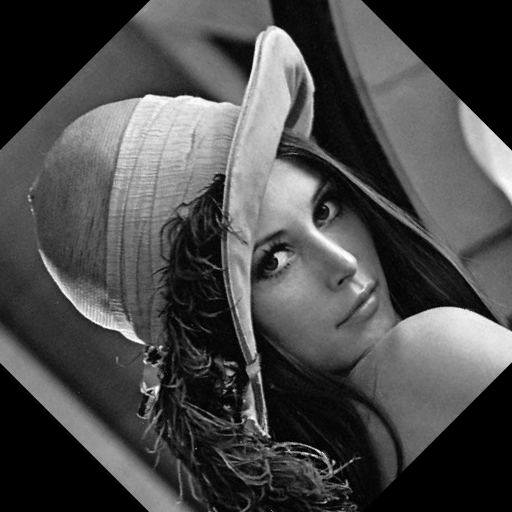

Rotated Image


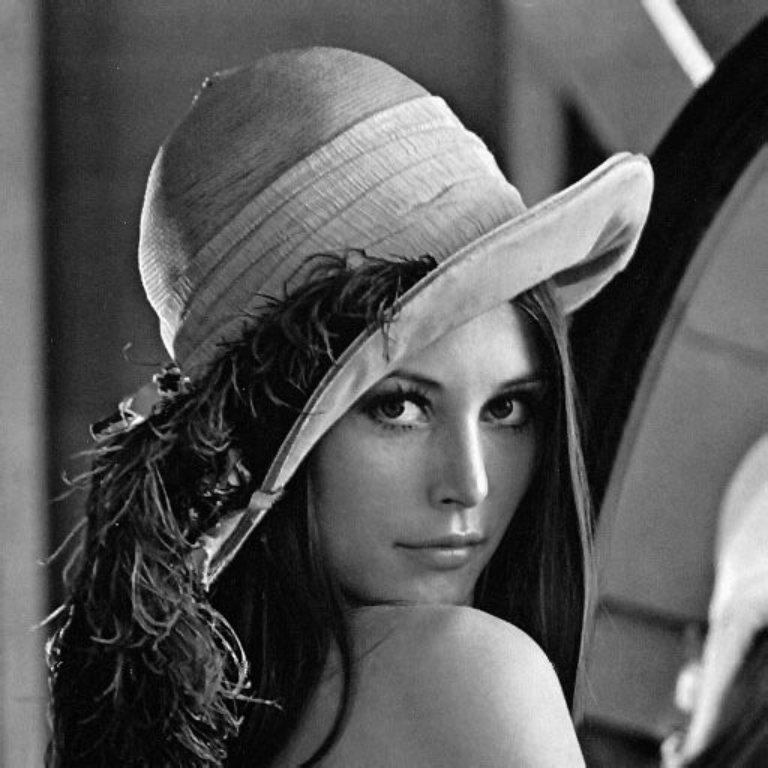

Scaled Image


Reflected Image


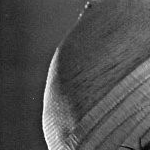

Cropped Image


Sheared Image (X-axis)


In [6]:
translated = translate(rectangle, 2, 3)
scaled = scale(translated, 2, 2)
rotated = rotate(scaled, 45)
image = cv2.imread("/content/Picture1.jpg")
if image is None:
    print("Error: Image not found.")
else:
    rows, cols, _ = image.shape

    # Translation
    M_translation = np.float32([[1, 0, 50], [0, 1, 50]])
    translated_image = cv2.warpAffine(image, M_translation, (cols, rows))

    # Rotation
    M_rotation = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)
    rotated_image = cv2.warpAffine(image, M_rotation, (cols, rows))

    # Scaling
    scaled_image = cv2.resize(image, None, fx=1.5, fy=1.5)

    # Reflection
    reflected_image = cv2.flip(image, 1)  # Horizontal flip

    # Cropping
    cropped_image = image[50:200, 50:200]

    # Shearing
    M_shear_x = np.float32([[1, 0.5, 0], [0, 1, 0]])
    sheared_image_x = cv2.warpAffine(image, M_shear_x, (int(cols * 1.5), rows))



    cv2_imshow(image)
    print("Original Image")
    cv2_imshow(translated_image)
    print("Translated Image")
    cv2_imshow(rotated_image)
    print("Rotated Image")
    cv2_imshow(scaled_image)
    print("Scaled Image")
    cv2_imshow(reflected_image)
    print("Reflected Image")
    cv2_imshow(cropped_image)
    print("Cropped Image")
    cv2_imshow(sheared_image_x)
    print("Sheared Image (X-axis)")